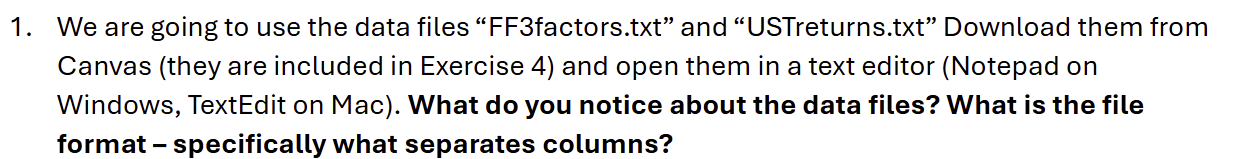

In [12]:
import numpy as np
import pandas as pd

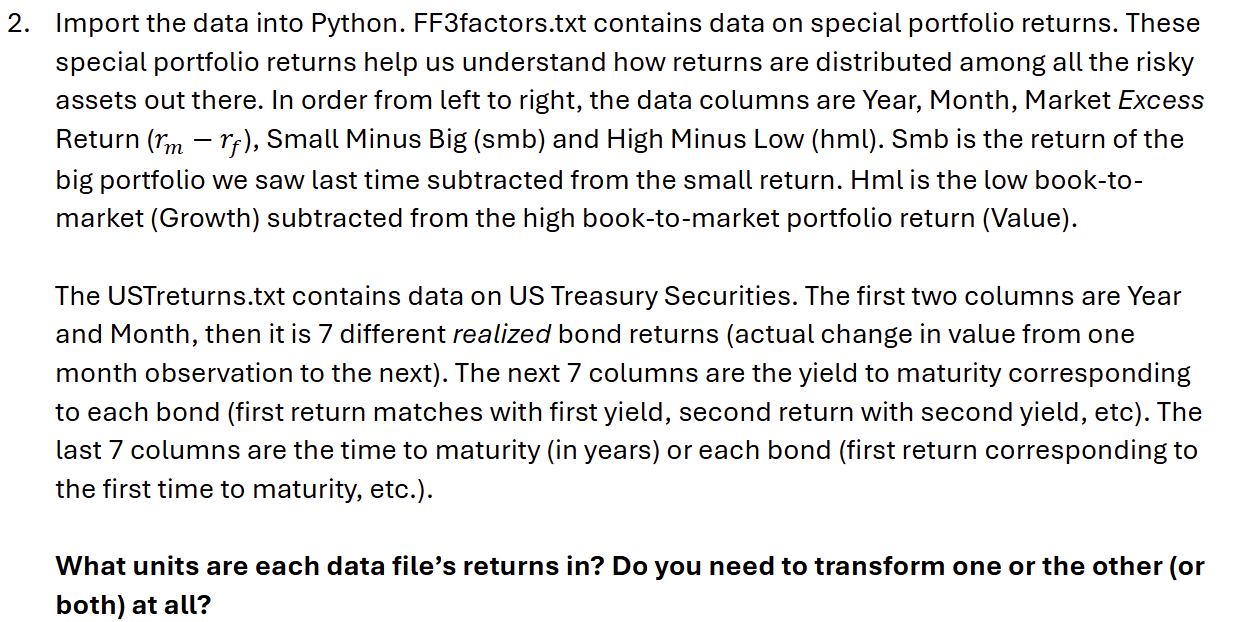

In [13]:
df_FF3 = pd.read_csv("FF3factors.txt", delimiter="\t", header=None)
df_UST = pd.read_csv("USTreturns.txt", delimiter="\t", header=None)

df_FF3.columns = ["Year", 
                  "Month", 
                  "Market Excess (Mkt Return - r_f)",  
                  "SMB (ME1-ME5)", 
                  "HML (BM5--value -BM1--growth)",
                  "Risk-free rate r_f"]

df_UST.columns = (["Year","Month"] +
        [f"ret_{i}" for i in range(1,8)] +
        [f"ytm_{i}" for i in range(1,8)] +
        [f"mat_{i}" for i in range(1,8)])

# ret = Price previous month/Price this month -1
# YTM is the yield of the bond until maturity
# Mat is the maturity left of the bond

In [14]:
# Covert the pandas df to numpy

for i in range(len(df_FF3.columns)):
    df_FF3[df_FF3.columns[i]] = pd.to_numeric(df_FF3[df_FF3.columns[i]])

for i in range(len(df_UST.columns)):
    df_UST[df_UST.columns[i]] = pd.to_numeric(df_UST[df_UST.columns[i]])

df_FF3.iloc[:, 2:]=df_FF3.iloc[:, 2:]/100
df_UST.iloc[:, 9:16]=df_UST.iloc[:, 9:16]/100


In [15]:
display(df_FF3)
display(df_UST)

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
0,1926,7,0.0296,-0.0230,-0.0287,0.0022
1,1926,8,0.0264,-0.0140,0.0419,0.0025
2,1926,9,0.0036,-0.0132,0.0001,0.0023
3,1926,10,-0.0324,0.0004,0.0051,0.0032
4,1926,11,0.0253,-0.0020,-0.0035,0.0031
...,...,...,...,...,...,...
1127,2020,6,0.0246,0.0270,-0.0222,0.0001
1128,2020,7,0.0577,-0.0218,-0.0131,0.0001
1129,2020,8,0.0763,-0.0026,-0.0295,0.0001
1130,2020,9,-0.0363,0.0006,-0.0256,0.0001


,Year,Month,ret_1,ret_2,ret_3,ret_4,ret_5,ret_6,ret_7,ytm_1,...,ytm_5,ytm_6,ytm_7,mat_1,mat_2,mat_3,mat_4,mat_5,mat_6,mat_7
0,1941,1,-0.00683,-0.00683,NaN,NaN,NaN,NaN,NaN,0.008199,...,NaN,NaN,NaN,4.8706,4.8706,NaN,NaN,NaN,NaN,NaN
1,1941,2,-0.00036,-0.00036,NaN,NaN,NaN,NaN,NaN,0.008409,...,NaN,NaN,NaN,4.7940,4.7940,NaN,NaN,NaN,NaN,NaN
2,1941,3,0.00095,0.00095,NaN,NaN,NaN,NaN,NaN,0.008020,...,NaN,NaN,NaN,3.4606,3.4606,NaN,NaN,NaN,NaN,NaN
3,1941,4,0.00030,0.00030,0.01395,0.01395,NaN,NaN,NaN,0.002983,...,NaN,NaN,NaN,1.8727,1.8727,8.8734,8.8734,NaN,NaN,NaN
4,1941,5,0.00186,0.00186,0.00255,0.00255,0.00172,NaN,NaN,0.002078,...,0.020626,NaN,NaN,1.7878,1.7878,8.7885,8.7885,12.7885,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,2019,8,0.00372,0.00834,0.02226,0.02796,0.04034,0.07933,0.12591,0.017985,...,0.014934,0.017642,0.019445,1.0048,2.0041,5.0048,6.9596,9.9603,19.9589,29.7084
944,2019,9,0.00094,-0.00130,-0.00591,-0.00926,-0.01354,-0.01974,-0.03028,0.018024,...,0.020310,0.019120,0.023425,1.0021,2.0014,5.0021,6.9185,9.8754,19.8741,29.8754
945,2019,10,0.00328,0.00327,0.00264,0.00201,-0.00043,-0.00884,-0.01263,0.016185,...,0.020551,0.019991,0.024118,1.0021,2.0014,5.0021,7.0418,9.7906,20.0411,29.7906
946,2019,11,0.00041,-0.00104,-0.00373,-0.00639,-0.00711,-0.00747,-0.00458,0.016848,...,0.021545,0.020623,0.024427,1.0048,2.0041,5.0048,6.9624,9.7112,19.9617,29.7112


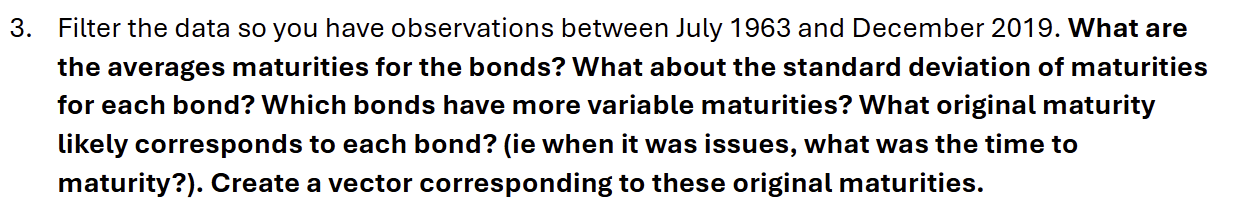

In [16]:
df_UST = df_UST[(df_UST["Year"]>=1963) & (df_UST["Month"]>=7)]
df_FF3 = df_FF3[((df_FF3["Year"]>=1963) & (df_FF3["Month"]>=7)) & 
                (df_FF3["Year"]<=2019) & (df_FF3["Month"]<=12)]

In [17]:
df_UST.reset_index(inplace=True)
df_UST.drop(columns="index", inplace=True)
df_FF3.reset_index(inplace=True)
df_FF3.drop(columns="index", inplace=True)


In [18]:
df_FF3

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
0,1963,7,-0.0039,-0.0056,-0.0083,0.0027
1,1963,8,0.0507,-0.0094,0.0167,0.0025
2,1963,9,-0.0157,-0.0030,0.0018,0.0027
3,1963,10,0.0253,-0.0054,-0.0010,0.0029
4,1963,11,-0.0085,-0.0113,0.0171,0.0027
...,...,...,...,...,...,...
337,2019,8,-0.0258,-0.0243,-0.0493,0.0016
338,2019,9,0.0143,-0.0099,0.0678,0.0018
339,2019,10,0.0206,0.0027,-0.0209,0.0015
340,2019,11,0.0387,0.0085,-0.0187,0.0012


In [19]:
df_UST

,Year,Month,ret_1,ret_2,ret_3,ret_4,ret_5,ret_6,ret_7,ytm_1,...,ytm_5,ytm_6,ytm_7,mat_1,mat_2,mat_3,mat_4,mat_5,mat_6,mat_7
0,1963,7,-0.00012,-0.00386,-0.00002,0.00390,0.00381,0.00185,0.00449,0.034801,...,0.039561,0.039191,0.036252,1.0431,1.7906,5.0431,7.0418,11.2936,21.7906,31.5455
1,1963,8,0.00245,0.00222,0.00181,0.00015,0.00160,0.00293,0.00277,0.035205,...,0.039743,0.039210,0.036262,0.9610,2.2122,4.9610,6.9596,11.2115,21.7084,31.4634
2,1963,9,0.00338,0.00262,0.00223,0.00552,-0.00174,0.00509,-0.00424,0.036603,...,0.040311,0.039094,0.036635,0.9199,2.1273,4.8761,6.8747,11.1266,21.6235,31.3785
3,1963,10,0.00186,0.00168,0.00111,-0.00005,-0.00007,-0.00386,-0.00426,0.036553,...,0.041033,0.039572,0.037013,1.0431,2.0424,5.0431,6.7899,9.7906,21.5387,31.2936
4,1963,11,0.00283,0.00244,0.00465,0.00466,0.00632,-0.00405,-0.00303,0.036604,...,0.040656,0.040053,0.037321,0.9637,1.9630,4.9637,6.7105,9.7112,21.4593,31.2142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2019,8,0.00372,0.00834,0.02226,0.02796,0.04034,0.07933,0.12591,0.017985,...,0.014934,0.017642,0.019445,1.0048,2.0041,5.0048,6.9596,9.9603,19.9589,29.7084
338,2019,9,0.00094,-0.00130,-0.00591,-0.00926,-0.01354,-0.01974,-0.03028,0.018024,...,0.020310,0.019120,0.023425,1.0021,2.0014,5.0021,6.9185,9.8754,19.8741,29.8754
339,2019,10,0.00328,0.00327,0.00264,0.00201,-0.00043,-0.00884,-0.01263,0.016185,...,0.020551,0.019991,0.024118,1.0021,2.0014,5.0021,7.0418,9.7906,20.0411,29.7906
340,2019,11,0.00041,-0.00104,-0.00373,-0.00639,-0.00711,-0.00747,-0.00458,0.016848,...,0.021545,0.020623,0.024427,1.0048,2.0041,5.0048,6.9624,9.7112,19.9617,29.7112


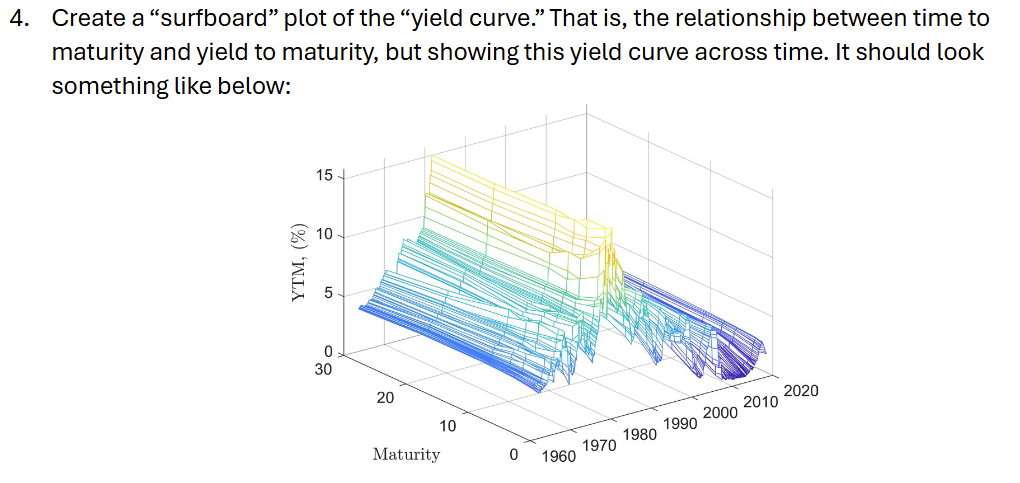

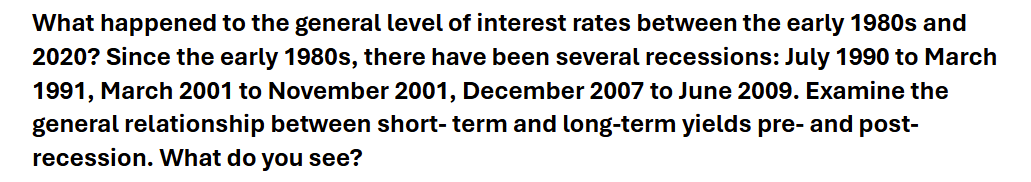

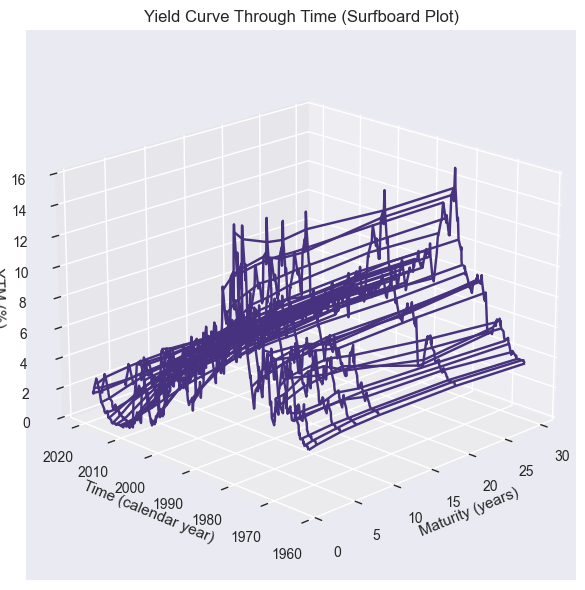

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

def yieldcurve_surfboard(df,
                         ytm_prefix='ytm_',
                         mat_prefix='mat_',
                         year_col='Year',
                         month_col='Month',
                         to_percent=True,
                         wire_stride=6):
    # 1) Build a proper datetime index (month-end)
    date = pd.to_datetime(dict(year=df[year_col], month=df[month_col], day=1))
    df = df.copy()
    df.index = date

    # 2) Identify YTM & maturity columns in the right order
    ytm_cols = sorted([c for c in df.columns if c.startswith(ytm_prefix)],
                      key=lambda c: int(c.split('_')[-1]))
    mat_cols = sorted([c for c in df.columns if c.startswith(mat_prefix)],
                      key=lambda c: int(c.split('_')[-1]))
    assert len(ytm_cols) == len(mat_cols) > 0, "Need the same number of ytm_* and mat_* cols"

    k = len(ytm_cols)
    T = len(df)

    # 3) X (maturities): take time-series median per tenor to get a stable axis
    #    If maturities are fixed per column, this just returns those constants.
    maturities = np.array([df[m].median(skipna=True) for m in mat_cols], dtype=float)

    # 4) Y (time): numeric axis in years (for a readable scale)
    time_years = df.index.year + (df.index.month - 0.5)/12.0  # mid-month
    time_axis = time_years.values

    # 5) Z (yields): T×k matrix ordered by time then maturity
    Z = np.column_stack([df[c].values for c in ytm_cols]).astype(float)
    if to_percent:
        Z = 100.0 * Z  # convert from decimals to %

    # 6) Create a wireframe “surfboard” plot
    fig = plt.figure(figsize=(11, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Broadcast grid
    X, Y = np.meshgrid(maturities, time_axis)
    # Optional: mask NaNs so the wireframe skips missing observations
    Z_masked = np.ma.masked_invalid(Z)

    ax.plot_wireframe(X, Y, Z_masked, rstride=wire_stride, cstride=1)

    ax.set_xlabel("Maturity (years)")
    ax.set_ylabel("Time (calendar year)")
    ax.set_zlabel("YTM (%)")
    ax.set_title("Yield Curve Through Time (Surfboard Plot)")

    # Nice viewing angle
    ax.view_init(elev=20, azim=-135)
    plt.tight_layout()
    plt.show()

# ---- Example call ----
yieldcurve_surfboard(df_UST)  # where df is your table


AttributeError: 'numpy.datetime64' object has no attribute 'year'

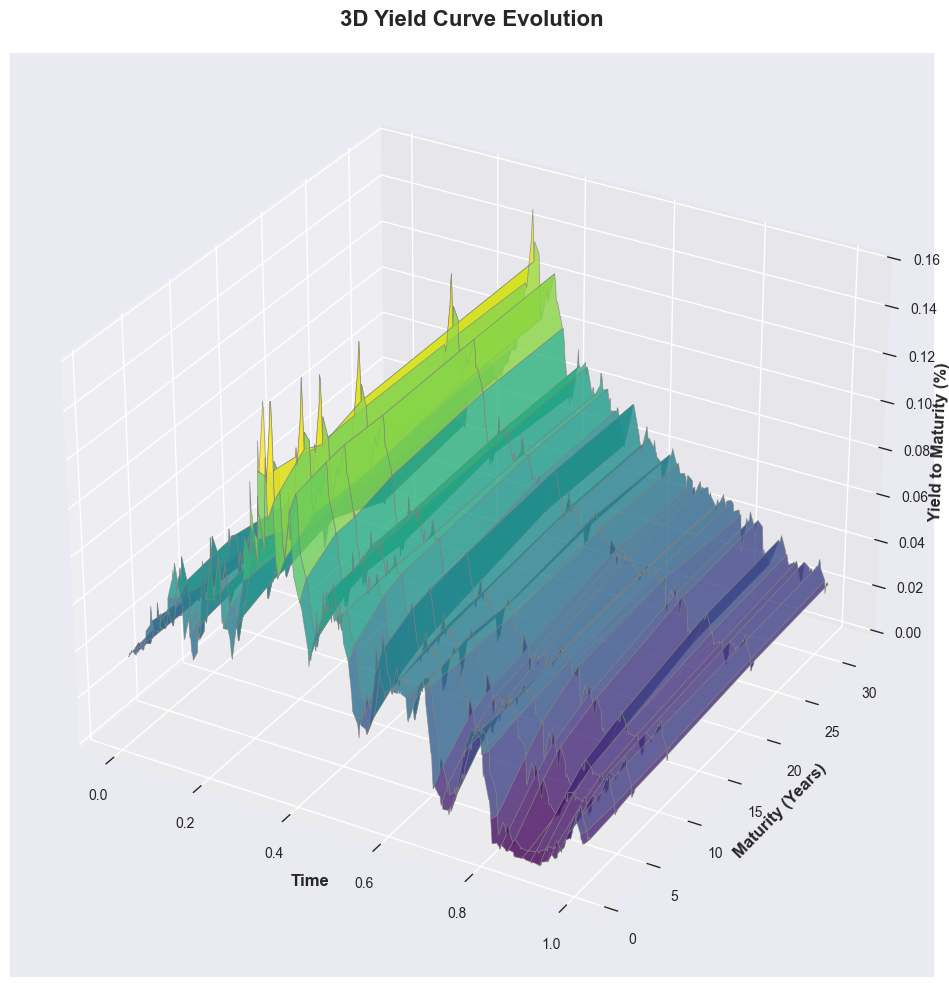

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

def load_and_prepare_data(df):
    """
    Prepare the bond data for 3D plotting
    Assumes df has columns: Year, Month, ret_1 to ret_7, ytm_1 to ytm_7, mat_1 to mat_7
    """
    # Create date column
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
    
    # Extract YTM columns (ytm_1 to ytm_7)
    ytm_cols = [col for col in df.columns if col.startswith('ytm_')]
    ytm_data = df[ytm_cols].values
    
    # Extract maturity columns (mat_1 to mat_7)
    mat_cols = [col for col in df.columns if col.startswith('mat_')]
    mat_data = df[mat_cols].values
    
    # Get the unique maturities (should be the same for each row)
    maturities = mat_data[0]  # Assuming maturities are constant over time
    
    return df['Date'].values, ytm_data, maturities

def create_yield_curve_surface(dates, ytm_data, maturities, title="3D Yield Curve Evolution"):
    """
    Create a 3D surface plot showing yield curve evolution over time
    """
    # Create figure with high DPI for better quality
    fig = plt.figure(figsize=(16, 12), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    
    # Convert dates to numeric values for plotting
    date_nums = mdates.date2num(dates)
    date_nums_norm = (date_nums - date_nums.min()) / (date_nums.max() - date_nums.min())
    
    # Create meshgrid for surface plot
    X, Y = np.meshgrid(date_nums_norm, maturities)
    Z = ytm_data.T  # Transpose so maturities are rows, dates are columns
    
    # Create the surface plot with custom colormap
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                          linewidth=0.5, antialiased=True, edgecolor='gray')
    
    # Customize the plot
    ax.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax.set_ylabel('Maturity (Years)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Yield to Maturity (%)', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Set custom x-axis labels with years
    years = [dates[0].year, dates[len(dates)//4].year, dates[len(dates)//2].year, 
             dates[3*len(dates)//4].year, dates[-1].year]
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels(years)
    
    # Add colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30, pad=0.1)
    cbar.set_label('Yield to Maturity (%)', fontsize=12, fontweight='bold')
    
    # Improve viewing angle
    ax.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    return fig, ax

def create_interactive_yield_curves(dates, ytm_data, maturities, 
                                  sample_periods=['1980-01', '1990-01', '2000-01', '2008-01', '2019-12']):
    """
    Create multiple yield curves for different time periods
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Colors for different periods
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']
    
    for i, period in enumerate(sample_periods):
        # Find the closest date to the sample period
        target_date = pd.to_datetime(period)
        date_diffs = [abs((date - target_date).days) for date in dates]
        closest_idx = np.argmin(date_diffs)
        
        # Plot yield curve for this period
        ax = axes[i]
        ax.plot(maturities, ytm_data[closest_idx], 'o-', 
               color=colors[i], linewidth=2, markersize=6)
        ax.set_title(f'Yield Curve - {dates[closest_idx].strftime("%B %Y")}', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Maturity (Years)', fontsize=12)
        ax.set_ylabel('Yield to Maturity (%)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, max(ytm_data.max() * 1.1, 0.1))
    
    # Use the last subplot for a combined comparison
    ax = axes[-1]
    for i, period in enumerate(sample_periods):
        target_date = pd.to_datetime(period)
        date_diffs = [abs((date - target_date).days) for date in dates]
        closest_idx = np.argmin(date_diffs)
        
        ax.plot(maturities, ytm_data[closest_idx], 'o-', 
               color=colors[i], linewidth=2, markersize=4,
               label=dates[closest_idx].strftime("%Y-%m"), alpha=0.8)
    
    ax.set_title('Yield Curve Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Maturity (Years)', fontsize=12)
    ax.set_ylabel('Yield to Maturity (%)', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def analyze_yield_curve_trends(dates, ytm_data, maturities):
    """
    Analyze and visualize yield curve trends over time
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Average yield level over time
    ax1 = axes[0, 0]
    avg_yields = np.mean(ytm_data, axis=1)
    ax1.plot(dates, avg_yields, linewidth=2, color='navy')
    ax1.set_title('Average Yield Level Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average YTM (%)')
    ax1.grid(True, alpha=0.3)
    
    # Highlight recession periods (approximate)
    recession_periods = [
        (datetime(1990, 7, 1), datetime(1991, 3, 1)),
        (datetime(2001, 3, 1), datetime(2001, 11, 1)),
        (datetime(2007, 12, 1), datetime(2009, 6, 1))
    ]
    
    for start, end in recession_periods:
        ax1.axvspan(start, end, alpha=0.3, color='red', label='Recession' if start == recession_periods[0][0] else "")
    ax1.legend()
    
    # 2. Yield spread (long-term - short-term) over time
    ax2 = axes[0, 1]
    # Assuming first maturity is shortest, last is longest
    yield_spread = ytm_data[:, -1] - ytm_data[:, 0]  # Long - Short
    ax2.plot(dates, yield_spread, linewidth=2, color='darkgreen')
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    ax2.set_title('Yield Spread (Long - Short Term)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Spread (%)')
    ax2.grid(True, alpha=0.3)
    
    for start, end in recession_periods:
        ax2.axvspan(start, end, alpha=0.3, color='red')
    
    # 3. Heatmap of yields by maturity over time
    ax3 = axes[1, 0]
    # Sample every 12th observation for better visibility
    sample_indices = np.arange(0, len(dates), 12)
    sample_dates = dates[sample_indices]
    sample_ytm = ytm_data[sample_indices]
    
    im = ax3.imshow(sample_ytm.T, aspect='auto', cmap='viridis', 
                    extent=[0, len(sample_dates), maturities[0], maturities[-1]])
    ax3.set_title('Yield Heatmap Over Time', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Maturity (Years)')
    
    # Set x-axis labels
    tick_indices = np.linspace(0, len(sample_dates)-1, 5).astype(int)
    ax3.set_xticks(tick_indices)
    ax3.set_xticklabels([sample_dates[i].strftime('%Y') for i in tick_indices])
    
    plt.colorbar(im, ax=ax3, label='YTM (%)')
    
    # 4. Yield volatility over time
    ax4 = axes[1, 1]
    # Calculate rolling volatility (standard deviation) for average yields
    window = 12  # 12-month rolling window
    volatility = pd.Series(avg_yields).rolling(window=window).std()
    ax4.plot(dates[window-1:], volatility[window-1:], linewidth=2, color='purple')
    ax4.set_title('Yield Volatility (12-month rolling)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Volatility (Std Dev)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def main():
    """
    Main function to demonstrate the yield curve analysis
    """
    # For demonstration, create sample data
    # Replace this section with your actual data loading:
    # df = pd.read_csv('your_bond_data.csv')
    
    # Sample data creation (replace with your data)
    np.random.seed(42)
    dates = pd.date_range('1963-07-01', '2019-12-01', freq='MS')
    maturities = np.array([0.25, 0.5, 1, 2, 5, 10, 30])  # Years
    n_periods = len(dates)
    n_maturities = len(maturities)
    
    # Generate realistic yield data with trends
    ytm_data = np.zeros((n_periods, n_maturities))
    
    for i, date in enumerate(dates):
        year_progress = (date.year - 1963) / (2019 - 1963)
        
        # Base yield curve (upward sloping)
        base_yields = 2.0 + maturities * 1.5
        
        # Add time trend (declining rates over time)
        time_trend = -6.0 * year_progress
        
        # Add cyclical patterns and noise
        cycle = 3.0 * np.sin(2 * np.pi * year_progress * 4) + \
                2.0 * np.sin(2 * np.pi * year_progress * 0.5)
        
        noise = np.random.normal(0, 0.5, n_maturities)
        
        ytm_data[i] = np.maximum(base_yields + time_trend + cycle + noise, 0.01)
    
    # Create the plots
    print("Creating 3D Yield Curve Surface Plot...")
    fig1, ax1 = create_yield_curve_surface(dates, ytm_data, maturities)
    plt.show()
    
    print("Creating Individual Yield Curves for Key Periods...")
    fig2 = create_interactive_yield_curves(dates, ytm_data, maturities)
    plt.show()
    
    print("Creating Trend Analysis Plots...")
    fig3 = analyze_yield_curve_trends(dates, ytm_data, maturities)
    plt.show()
    
    print("Analysis complete!")

if __name__ == "__main__":
    dates, ytm_data, maturities = load_and_prepare_data(df_UST)
    fig1, ax1 = create_yield_curve_surface(dates, ytm_data, maturities)
    plt.show()
    
    fig2 = create_interactive_yield_curves(dates, ytm_data, maturities)
    plt.show()
    
    fig3 = analyze_yield_curve_trends(dates, ytm_data, maturities)
    plt.show()

    main()

# Instructions for using with your actual data:
"""
To use this code with your actual dataset:

1. Load your data:
   df = pd.read_csv('your_file.csv')

2. Make sure your columns are properly named:
   - Year, Month (first two columns)
   - ret_1, ret_2, ..., ret_7 (returns - columns 3-9)
   - ytm_1, ytm_2, ..., ytm_7 (yields - columns 10-16) 
   - mat_1, mat_2, ..., mat_7 (maturities - columns 17-23)

3. Call the functions:

Key Analysis Points:
- The 3D surface shows how yield curves evolved from 1963-2019
- Higher yields in early 1980s (Volcker era) appear as peaks
- General decline in rates over time shows as downward slope
- Recessions show as temporary flattening/inversion periods
- The trend analysis breaks down different aspects of yield behavior
"""

C:\Users\rohil\AppData\Local\Temp\ipykernel_10896\2213241494.py:80: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


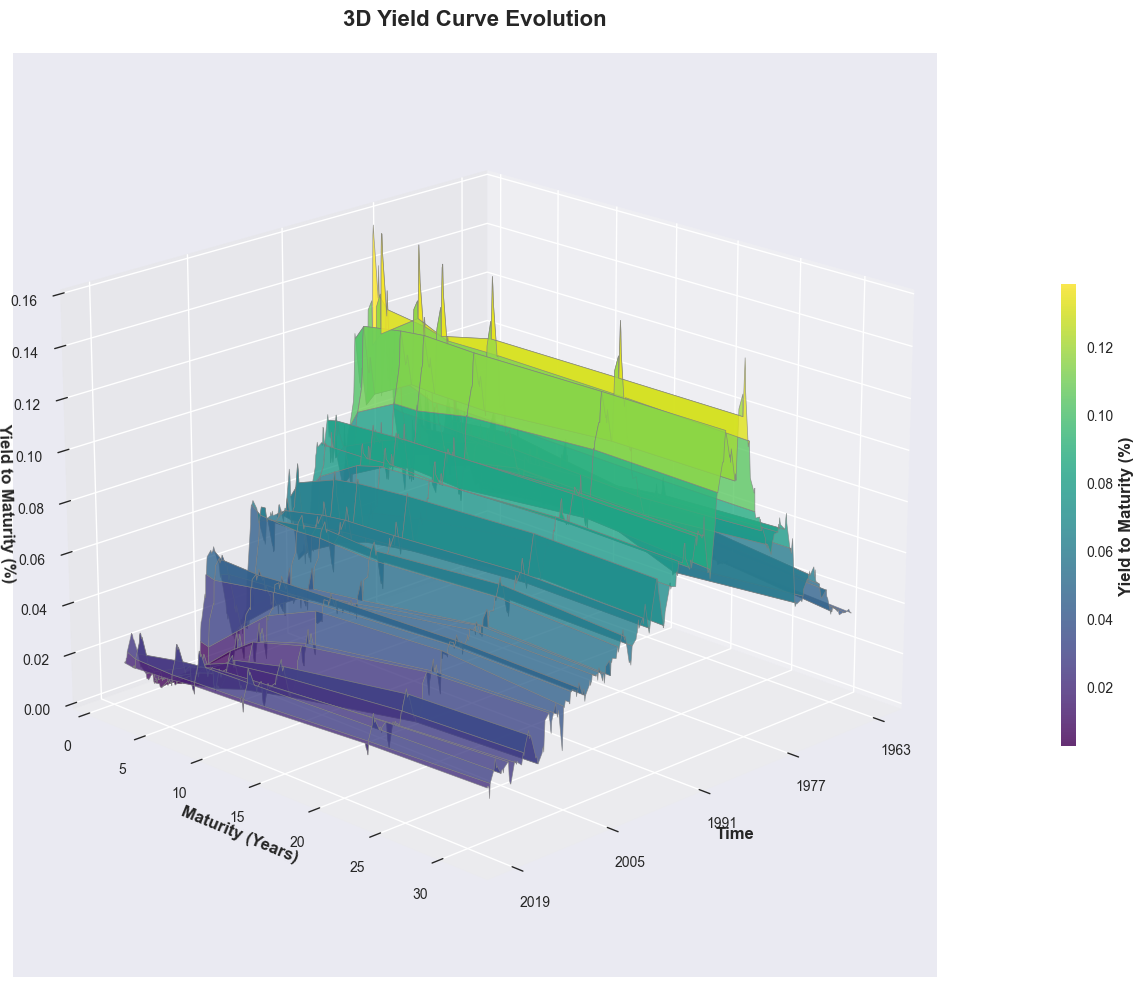

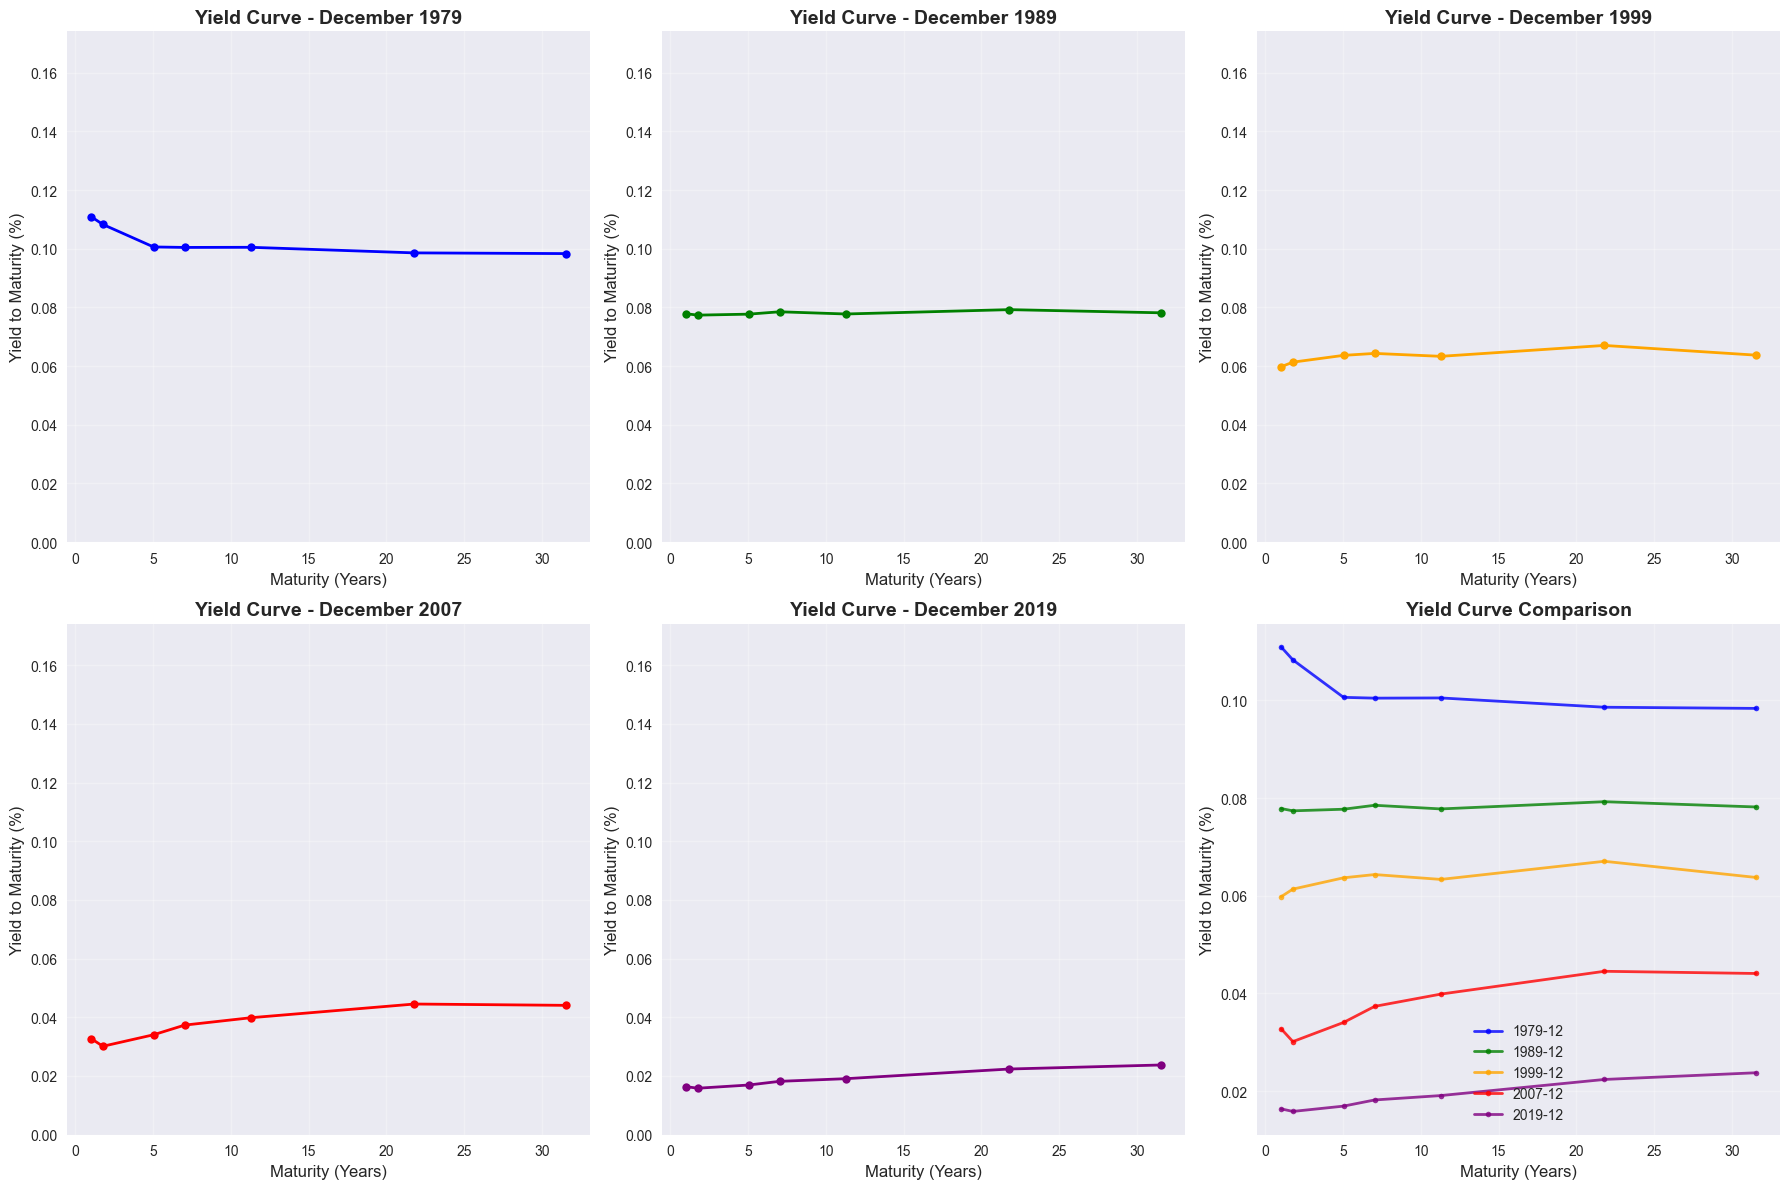

KeyError: np.int64(7)

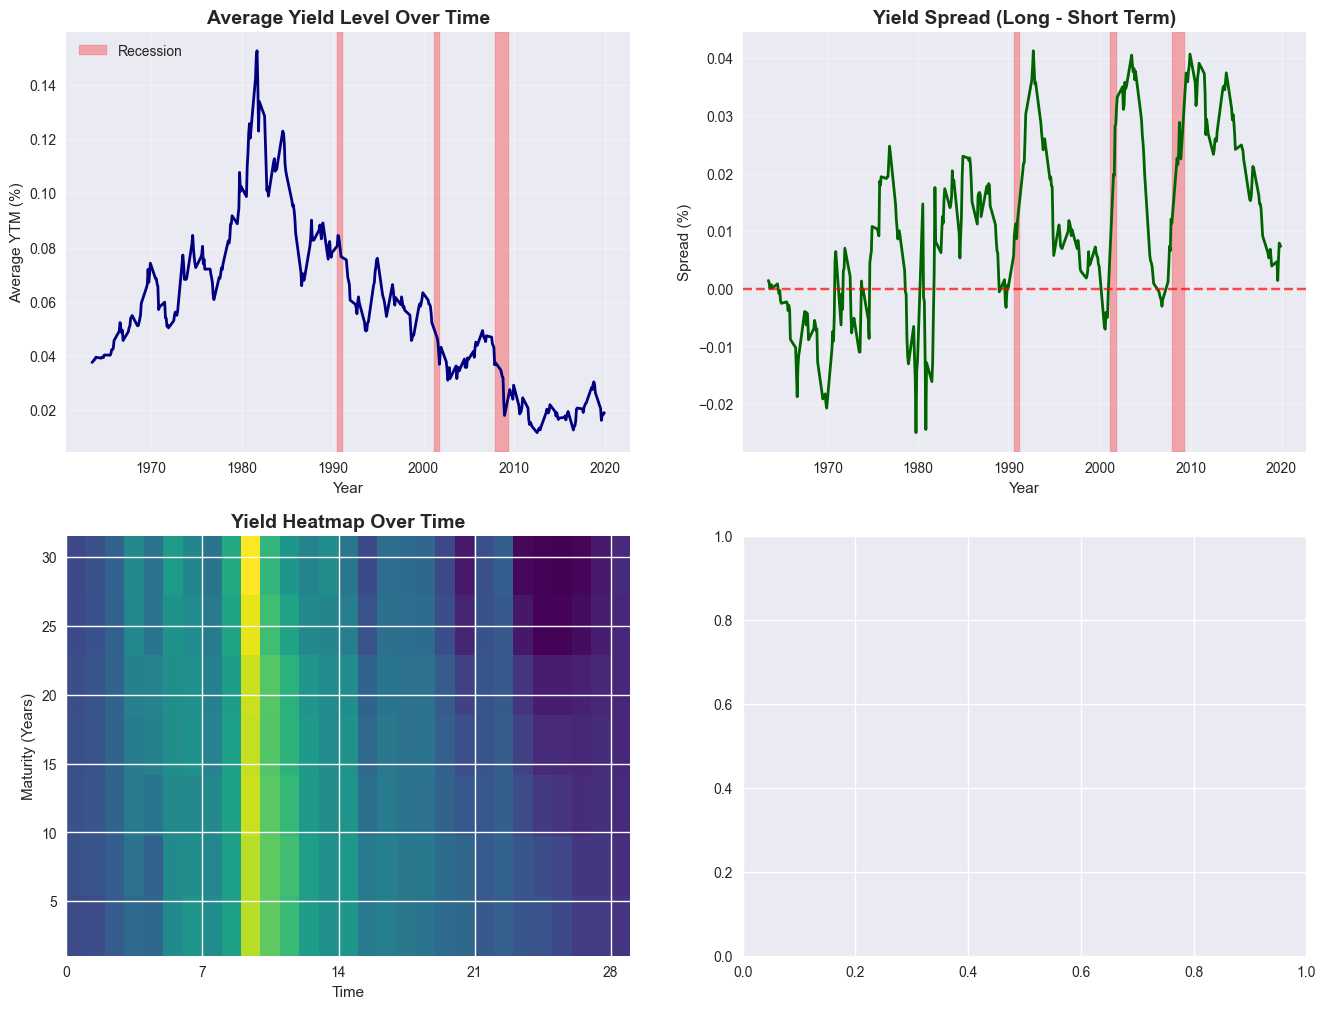

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

def load_and_prepare_data(df):
    """
    Prepare the bond data for 3D plotting
    Assumes df has columns: Year, Month, ret_1 to ret_7, ytm_1 to ytm_7, mat_1 to mat_7
    """
    # Create date column - ensure it's pandas datetime
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
    
    # Extract YTM columns (ytm_1 to ytm_7)
    ytm_cols = [col for col in df.columns if col.startswith('ytm_')]
    ytm_data = df[ytm_cols].values
    
    # Extract maturity columns (mat_1 to mat_7)
    mat_cols = [col for col in df.columns if col.startswith('mat_')]
    mat_data = df[mat_cols].values
    
    # Get the unique maturities (should be the same for each row)
    maturities = mat_data[0]  # Assuming maturities are constant over time
    
    # Return pandas datetime series instead of numpy array
    return df['Date'], ytm_data, maturities

def create_yield_curve_surface(dates, ytm_data, maturities, title="3D Yield Curve Evolution"):
    """
    Create a 3D surface plot showing yield curve evolution over time
    """
    # Create figure with high DPI for better quality
    fig = plt.figure(figsize=(16, 12), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    
    # Ensure dates is pandas datetime series
    if not isinstance(dates, pd.Series):
        dates = pd.Series(dates)
    
    # Convert dates to numeric values for plotting
    date_nums = mdates.date2num(dates)
    date_nums_norm = (date_nums - date_nums.min()) / (date_nums.max() - date_nums.min())
    
    # Create meshgrid for surface plot
    X, Y = np.meshgrid(date_nums_norm, maturities)
    Z = ytm_data.T  # Transpose so maturities are rows, dates are columns
    
    # Create the surface plot with custom colormap
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                          linewidth=0.5, antialiased=True, edgecolor='gray')
    
    # Customize the plot
    ax.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax.set_ylabel('Maturity (Years)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Yield to Maturity (%)', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Set custom x-axis labels with years
    # Convert to pandas datetime for easier access
    years = [dates.iloc[0].year, dates.iloc[len(dates)//4].year, dates.iloc[len(dates)//2].year, 
             dates.iloc[3*len(dates)//4].year, dates.iloc[-1].year]
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels(years)
    
    # Add colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30, pad=0.1)
    cbar.set_label('Yield to Maturity (%)', fontsize=12, fontweight='bold')
    
    # Improve viewing angle
    ax.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    return fig, ax

def create_interactive_yield_curves(dates, ytm_data, maturities, 
                                  sample_periods=['1980-01', '1990-01', '2000-01', '2008-01', '2019-12']):
    """
    Create multiple yield curves for different time periods
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Colors for different periods
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']
    
    for i, period in enumerate(sample_periods):
        # Find the closest date to the sample period
        target_date = pd.to_datetime(period)
        date_diffs = [abs((date - target_date).days) for date in dates]
        closest_idx = np.argmin(date_diffs)
        
        # Plot yield curve for this period
        ax = axes[i]
        ax.plot(maturities, ytm_data[closest_idx], 'o-', 
               color=colors[i], linewidth=2, markersize=6)
        ax.set_title(f'Yield Curve - {dates[closest_idx].strftime("%B %Y")}', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Maturity (Years)', fontsize=12)
        ax.set_ylabel('Yield to Maturity (%)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, max(ytm_data.max() * 1.1, 0.1))
    
    # Use the last subplot for a combined comparison
    ax = axes[-1]
    for i, period in enumerate(sample_periods):
        target_date = pd.to_datetime(period)
        date_diffs = [abs((date - target_date).days) for date in dates]
        closest_idx = np.argmin(date_diffs)
        
        ax.plot(maturities, ytm_data[closest_idx], 'o-', 
               color=colors[i], linewidth=2, markersize=4,
               label=dates[closest_idx].strftime("%Y-%m"), alpha=0.8)
    
    ax.set_title('Yield Curve Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Maturity (Years)', fontsize=12)
    ax.set_ylabel('Yield to Maturity (%)', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def analyze_yield_curve_trends(dates, ytm_data, maturities):
    """
    Analyze and visualize yield curve trends over time
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Average yield level over time
    ax1 = axes[0, 0]
    avg_yields = np.mean(ytm_data, axis=1)
    ax1.plot(dates, avg_yields, linewidth=2, color='navy')
    ax1.set_title('Average Yield Level Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average YTM (%)')
    ax1.grid(True, alpha=0.3)
    
    # Highlight recession periods (approximate)
    recession_periods = [
        (datetime(1990, 7, 1), datetime(1991, 3, 1)),
        (datetime(2001, 3, 1), datetime(2001, 11, 1)),
        (datetime(2007, 12, 1), datetime(2009, 6, 1))
    ]
    
    for start, end in recession_periods:
        ax1.axvspan(start, end, alpha=0.3, color='red', label='Recession' if start == recession_periods[0][0] else "")
    ax1.legend()
    
    # 2. Yield spread (long-term - short-term) over time
    ax2 = axes[0, 1]
    # Assuming first maturity is shortest, last is longest
    yield_spread = ytm_data[:, -1] - ytm_data[:, 0]  # Long - Short
    ax2.plot(dates, yield_spread, linewidth=2, color='darkgreen')
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    ax2.set_title('Yield Spread (Long - Short Term)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Spread (%)')
    ax2.grid(True, alpha=0.3)
    
    for start, end in recession_periods:
        ax2.axvspan(start, end, alpha=0.3, color='red')
    
    # 3. Heatmap of yields by maturity over time
    ax3 = axes[1, 0]
    # Sample every 12th observation for better visibility
    sample_indices = np.arange(0, len(dates), 12)
    sample_dates = dates[sample_indices]
    sample_ytm = ytm_data[sample_indices]
    
    im = ax3.imshow(sample_ytm.T, aspect='auto', cmap='viridis', 
                    extent=[0, len(sample_dates), maturities[0], maturities[-1]])
    ax3.set_title('Yield Heatmap Over Time', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Maturity (Years)')
    
    # Set x-axis labels
    tick_indices = np.linspace(0, len(sample_dates)-1, 5).astype(int)
    ax3.set_xticks(tick_indices)
    ax3.set_xticklabels([sample_dates[i].strftime('%Y') for i in tick_indices])
    
    plt.colorbar(im, ax=ax3, label='YTM (%)')
    
    # 4. Yield volatility over time
    ax4 = axes[1, 1]
    # Calculate rolling volatility (standard deviation) for average yields
    window = 12  # 12-month rolling window
    volatility = pd.Series(avg_yields).rolling(window=window).std()
    ax4.plot(dates[window-1:], volatility[window-1:], linewidth=2, color='purple')
    ax4.set_title('Yield Volatility (12-month rolling)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Volatility (Std Dev)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def main():
    """
    Main function to demonstrate the yield curve analysis
    """
    # For demonstration, create sample data
    # Replace this section with your actual data loading:
    # df = pd.read_csv('your_bond_data.csv')
    
    # Sample data creation (replace with your data)
    np.random.seed(42)
    dates = pd.date_range('1963-07-01', '2019-12-01', freq='MS')
    maturities = np.array([0.25, 0.5, 1, 2, 5, 10, 30])  # Years
    n_periods = len(dates)
    n_maturities = len(maturities)
    
    # Generate realistic yield data with trends
    ytm_data = np.zeros((n_periods, n_maturities))
    
    for i, date in enumerate(dates):
        year_progress = (date.year - 1963) / (2019 - 1963)
        
        # Base yield curve (upward sloping)
        base_yields = 2.0 + maturities * 1.5
        
        # Add time trend (declining rates over time)
        time_trend = -6.0 * year_progress
        
        # Add cyclical patterns and noise
        cycle = 3.0 * np.sin(2 * np.pi * year_progress * 4) + \
                2.0 * np.sin(2 * np.pi * year_progress * 0.5)
        
        noise = np.random.normal(0, 0.5, n_maturities)
        
        ytm_data[i] = np.maximum(base_yields + time_trend + cycle + noise, 0.01)
    
    # Create the plots
    print("Creating 3D Yield Curve Surface Plot...")
    fig1, ax1 = create_yield_curve_surface(dates, ytm_data, maturities)
    plt.show()
    
    print("Creating Individual Yield Curves for Key Periods...")
    fig2 = create_interactive_yield_curves(dates, ytm_data, maturities)
    plt.show()
    
    print("Creating Trend Analysis Plots...")
    fig3 = analyze_yield_curve_trends(dates, ytm_data, maturities)
    plt.show()
    
    print("Analysis complete!")

if __name__ == "__main__":
    dates, ytm_data, maturities = load_and_prepare_data(df_UST)
    fig1, ax1 = create_yield_curve_surface(dates, ytm_data, maturities)
    plt.show()
    
    fig2 = create_interactive_yield_curves(dates, ytm_data, maturities)
    plt.show()
    
    fig3 = analyze_yield_curve_trends(dates, ytm_data, maturities)
    plt.show()

    main()

# Instructions for using with your actual data:
"""
To use this code with your actual dataset:

1. Load your data:
   df = pd.read_csv('your_file.csv')

2. Make sure your columns are properly named:
   - Year, Month (first two columns)
   - ret_1, ret_2, ..., ret_7 (returns - columns 3-9)
   - ytm_1, ytm_2, ..., ytm_7 (yields - columns 10-16) 
   - mat_1, mat_2, ..., mat_7 (maturities - columns 17-23)

3. Call the functions:
   dates, ytm_data, maturities = load_and_prepare_data(df)
   
   # Create 3D surface plot
   fig1, ax1 = create_yield_curve_surface(dates, ytm_data, maturities)
   plt.show()
   
   # Create comparison plots
   fig2 = create_interactive_yield_curves(dates, ytm_data, maturities)
   plt.show()
   
   # Create trend analysis
   fig3 = analyze_yield_curve_trends(dates, ytm_data, maturities)
   plt.show()

Key Analysis Points:
- The 3D surface shows how yield curves evolved from 1963-2019
- Higher yields in early 1980s (Volcker era) appear as peaks
- General decline in rates over time shows as downward slope
- Recessions show as temporary flattening/inversion periods
- The trend analysis breaks down different aspects of yield behavior
"""